## 1. Import thư viện cần thiết

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Đã import thành công tất cả thư viện")

Đã import thành công tất cả thư viện


## 2. Tải và khám phá dữ liệu

In [3]:
# Đọc dữ liệu
df = pd.read_csv('wireless_communication_dataset.csv')

print("=" * 80)
print("THÔNG TIN DỮ LIỆU")
print("=" * 80)
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số hàng: {df.shape[0]}, Số cột: {df.shape[1]}")
print("\n" + "=" * 80)
print("5 HÀNG ĐẦU TIÊN")
print("=" * 80)
print(df.head())

THÔNG TIN DỮ LIỆU
Kích thước dữ liệu: (5000, 17)
Số hàng: 5000, Số cột: 17

5 HÀNG ĐẦU TIÊN
   User Speed (m/s)  User Direction (degrees)  Handover Events  \
0         11.236204                141.708787                3   
1         28.521429                170.436837                1   
2         21.959818                307.637062                4   
3         17.959755                122.401579                2   
4          4.680559                313.073887                2   

   Distance from Base Station (m)  Signal Strength (dBm)   SNR (dB)       BER  \
0                       87.091364             -87.886237   9.873987  0.017131   
1                      199.782278             -75.510120  17.805576  0.011506   
2                      912.157091             -75.471315  15.971376  0.031310   
3                       29.106141             -80.946512  11.769882  0.002074   
4                      656.897605             -91.087291   9.013502  0.008954   

  Modulation Scheme    P

In [4]:
# Thông tin chi tiết về các cột
print("=" * 80)
print("THÔNG TIN CHI TIẾT CÁC CỘT")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("THỐNG KÊ MÔ TẢ")
print("=" * 80)
print(df.describe())

THÔNG TIN CHI TIẾT CÁC CỘT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   User Speed (m/s)                5000 non-null   float64
 1   User Direction (degrees)        5000 non-null   float64
 2   Handover Events                 5000 non-null   int64  
 3   Distance from Base Station (m)  5000 non-null   float64
 4   Signal Strength (dBm)           5000 non-null   float64
 5   SNR (dB)                        5000 non-null   float64
 6   BER                             5000 non-null   float64
 7   Modulation Scheme               5000 non-null   object 
 8   PDR (%)                         5000 non-null   float64
 9   Network Congestion              5000 non-null   object 
 10  Throughput (Mbps)               5000 non-null   float64
 11  Latency (ms)                    5000 non-null   float64
 12  Retrans

In [22]:
# Kiểm tra giá trị thiếu
print("=" * 80)
print("KIỂM TRA GIÁ TRỊ THIẾU")
print("=" * 80)
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print(" Không có giá trị thiếu trong dữ liệu")

# Kiểm tra biến mục tiêu
print("\n" + "=" * 80)
print("PHÂN PHỐI BIẾN MỤC TIÊU (RF Link Quality)")
print("=" * 80)
print(df['RF Link Quality'].value_counts())
print("\nTỷ lệ phần trăm:")
print(df['RF Link Quality'].value_counts(normalize=True) * 100)

KIỂM TRA GIÁ TRỊ THIẾU
 Không có giá trị thiếu trong dữ liệu

PHÂN PHỐI BIẾN MỤC TIÊU (RF Link Quality)
RF Link Quality
Poor        3357
Moderate     833
0            665
Good         145
Name: count, dtype: int64

Tỷ lệ phần trăm:
RF Link Quality
Poor        67.14
Moderate    16.66
0           13.30
Good         2.90
Name: proportion, dtype: float64


## 3. Phân tích và xác định loại cột

In [5]:
# Xác định cột mục tiêu
target_column = 'RF Link Quality'

# Phân loại các cột theo kiểu dữ liệu
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Loại bỏ cột mục tiêu khỏi danh sách features
if target_column in numeric_features:
    numeric_features.remove(target_column)
if target_column in categorical_features:
    categorical_features.remove(target_column)

print("=" * 80)
print("PHÂN LOẠI CÁC CỘT")
print("=" * 80)
print(f"\nCÁC CỘT SỐ ({len(numeric_features)} cột):")
for i, col in enumerate(numeric_features, 1):
    print(f"  {i}. {col}")

print(f"\nCÁC CỘT PHÂN LOẠI ({len(categorical_features)} cột):")
for i, col in enumerate(categorical_features, 1):
    unique_count = df[col].nunique()
    print(f"  {i}. {col} - {unique_count} giá trị duy nhất: {df[col].unique()[:5]}")

print(f"\nCỘT MỤC TIÊU: {target_column}")
print(f"   Các lớp: {sorted(df[target_column].unique())}")

PHÂN LOẠI CÁC CỘT

CÁC CỘT SỐ (14 cột):
  1. User Speed (m/s)
  2. User Direction (degrees)
  3. Handover Events
  4. Distance from Base Station (m)
  5. Signal Strength (dBm)
  6. SNR (dB)
  7. BER
  8. PDR (%)
  9. Throughput (Mbps)
  10. Latency (ms)
  11. Retransmission Count
  12. Power Consumption (mW)
  13. Battery Level (%)
  14. Transmission Power (dBm)

CÁC CỘT PHÂN LOẠI (2 cột):
  1. Modulation Scheme - 4 giá trị duy nhất: ['16-QAM' 'BPSK' '64-QAM' 'QPSK']
  2. Network Congestion - 3 giá trị duy nhất: ['High' 'Low' 'Medium']

CỘT MỤC TIÊU: RF Link Quality
   Các lớp: ['0', 'Good', 'Moderate', 'Poor']


## 4. Trực quan hóa dữ liệu

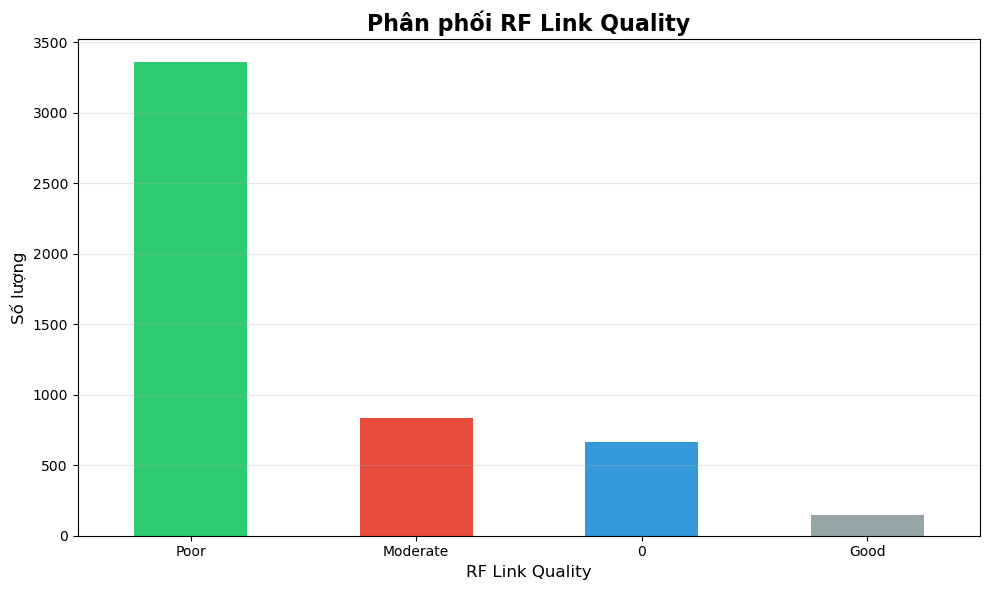

In [23]:
# Biểu đồ phân phối biến mục tiêu
plt.figure(figsize=(10, 6))
df['RF Link Quality'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c', '#3498db', '#95a5a6'])
plt.title('Phân phối RF Link Quality', fontsize=16, fontweight='bold')
plt.xlabel('RF Link Quality', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


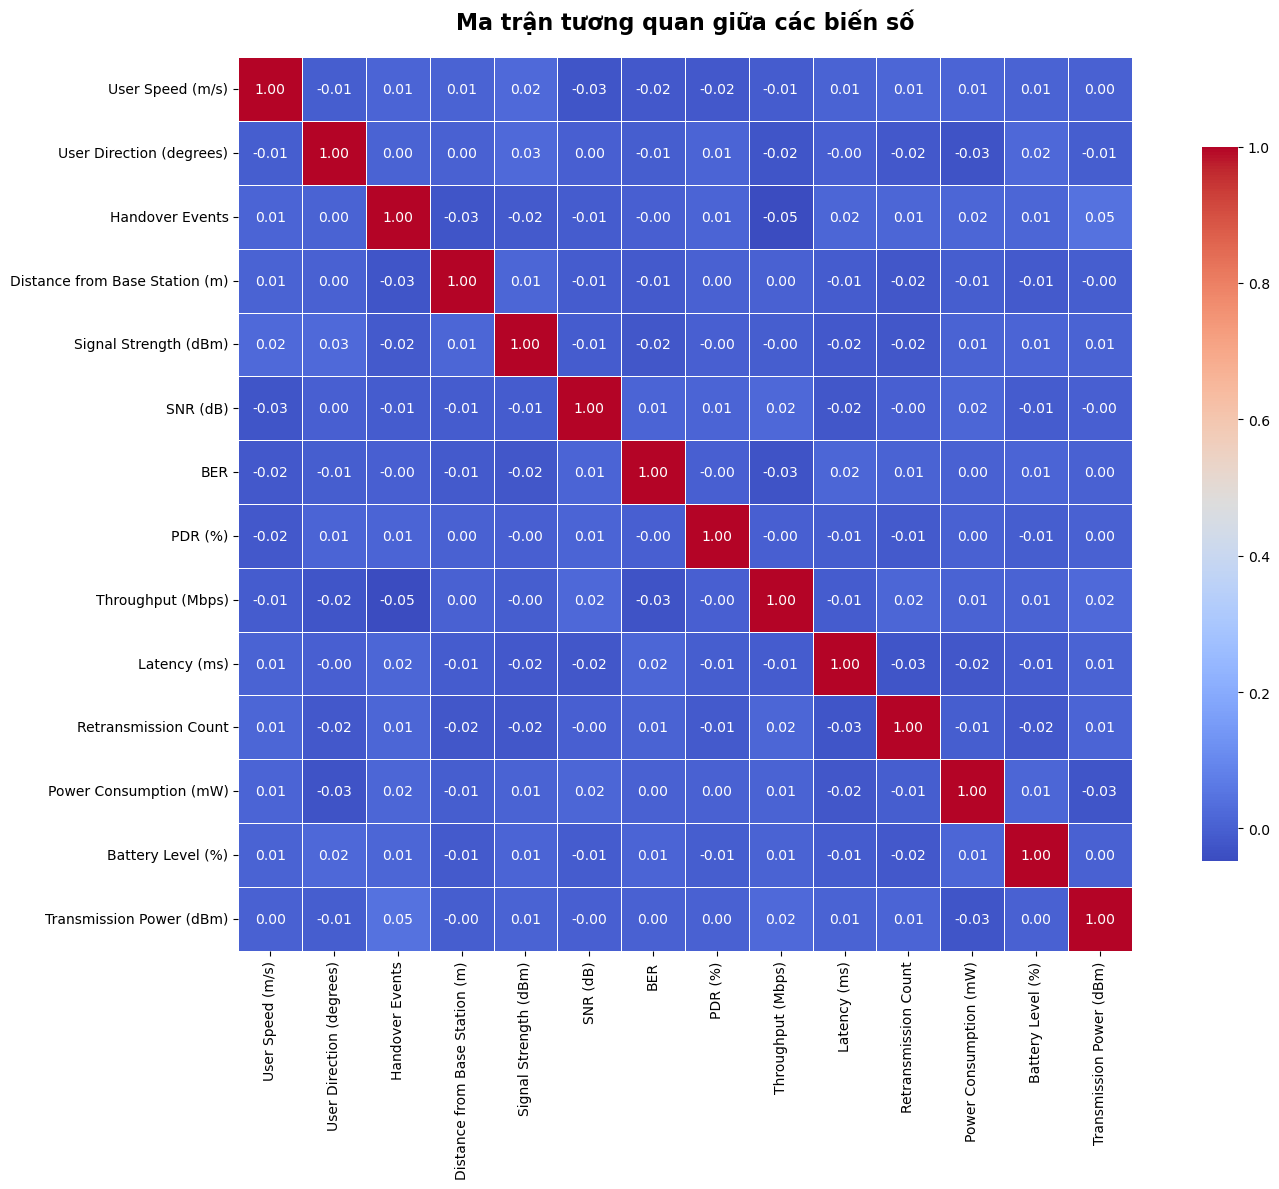

In [24]:
# Ma trận tương quan cho các biến số
plt.figure(figsize=(16, 12))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan giữa các biến số', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. Chuẩn bị dữ liệu

In [26]:
# Xử lý biến mục tiêu nếu có giá trị 0 (unknown)
# Loại bỏ các hàng có RF Link Quality = 0
df_cleaned = df[df['RF Link Quality'] != '0'].copy()

print(f"Số hàng trước khi làm sạch: {len(df)}")
print(f"Số hàng sau khi làm sạch: {len(df_cleaned)}")
print(f"Số hàng đã loại bỏ: {len(df) - len(df_cleaned)}")

# Tách features và target
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

print(f"\nKích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")
print(f"\nPhân phối lớp sau khi làm sạch:")
print(y.value_counts())

Số hàng trước khi làm sạch: 5000
Số hàng sau khi làm sạch: 4335
Số hàng đã loại bỏ: 665

Kích thước X: (4335, 16)
Kích thước y: (4335,)

Phân phối lớp sau khi làm sạch:
RF Link Quality
Poor        3357
Moderate     833
Good         145
Name: count, dtype: int64


In [11]:
# Chia dữ liệu train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 80)
print("CHIA DỮ LIỆU TRAIN/TEST")
print("=" * 80)
print(f"\nTổng quan:")
print(f"  • Tổng số mẫu: {len(X)}")
print(f"  • Tập train: {len(X_train)} mẫu ({len(X_train)/len(X)*100:.1f}%)")
print(f"  • Tập test: {len(X_test)} mẫu ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nPhân phối lớp trong tập train:")
print(y_train.value_counts())

print(f"\nPhân phối lớp trong tập test:")
print(y_test.value_counts())

CHIA DỮ LIỆU TRAIN/TEST

Tổng quan:
  • Tổng số mẫu: 4335
  • Tập train: 3468 mẫu (80.0%)
  • Tập test: 867 mẫu (20.0%)

Phân phối lớp trong tập train:
RF Link Quality
Poor        2686
Moderate     666
Good         116
Name: count, dtype: int64

Phân phối lớp trong tập test:
RF Link Quality
Poor        671
Moderate    167
Good         29
Name: count, dtype: int64


## 6. Xây dựng Pipeline với ColumnTransformer

Pipeline bao gồm:
1. **ColumnTransformer** để xử lý riêng biệt:
   - Cột số: StandardScaler (chuẩn hóa)
   - Cột phân loại: OneHotEncoder (mã hóa)
2. **Classifier**: DecisionTreeClassifier hoặc KNeighborsClassifier

In [ ]:
# Định nghĩa preprocessor với ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Giữ nguyên các cột không được chỉ định
)

print("=" * 80)
print("PREPROCESSOR - COLUMNTRANSFORMER")
print("=" * 80)
print("\nDa tao ColumnTransformer voi:")
print(f"  - StandardScaler cho {len(numeric_features)} cot so")
print(f"  - OneHotEncoder cho {len(categorical_features)} cot phan loai")
print("\nChi tiet preprocessor:")
print(preprocessor)

PREPROCESSOR - COLUMNTRANSFORMER

 Đã tạo ColumnTransformer với:
  • StandardScaler cho 14 cột số
  • OneHotEncoder cho 2 cột phân loại

 Chi tiết preprocessor:
ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['User Speed (m/s)',
                                  'User Direction (degrees)', 'Handover Events',
                                  'Distance from Base Station (m)',
                                  'Signal Strength (dBm)', 'SNR (dB)', 'BER',
                                  'PDR (%)', 'Throughput (Mbps)',
                                  'Latency (ms)', 'Retransmission Count',
                                  'Power Consumption (mW)', 'Battery Level (%)',
                                  'Transmission Power (dBm)']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output

### 6.1 Pipeline với DecisionTreeClassifier

In [ ]:
# Tạo pipeline với DecisionTreeClassifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10))
])

print("=" * 80)
print("PIPELINE 1: DECISION TREE CLASSIFIER")
print("=" * 80)
print("\nCau truc Pipeline:")
print(pipeline_dt)

# Huấn luyện model
print("\nDang huan luyen Decision Tree...")
pipeline_dt.fit(X_train, y_train)
print("Hoan thanh huan luyen Decision Tree!")

# Dự đoán
y_pred_dt = pipeline_dt.predict(X_test)

# Đánh giá
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("\n" + "=" * 80)
print("KET QUA DECISION TREE CLASSIFIER")
print("=" * 80)
print(f"\nAccuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")
print(f"F1-Score (weighted): {f1_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

PIPELINE 1: DECISION TREE CLASSIFIER

 Cấu trúc Pipeline:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['User Speed (m/s)',
                                                   'User Direction (degrees)',
                                                   'Handover Events',
                                                   'Distance from Base Station '
                                                   '(m)',
                                                   'Signal Strength (dBm)',
                                                   'SNR (dB)', 'BER', 'PDR (%)',
                                                   'Throughput (Mbps)',
                                                   'Latency (ms)',
                                                   'Retransmission Count',
                                            

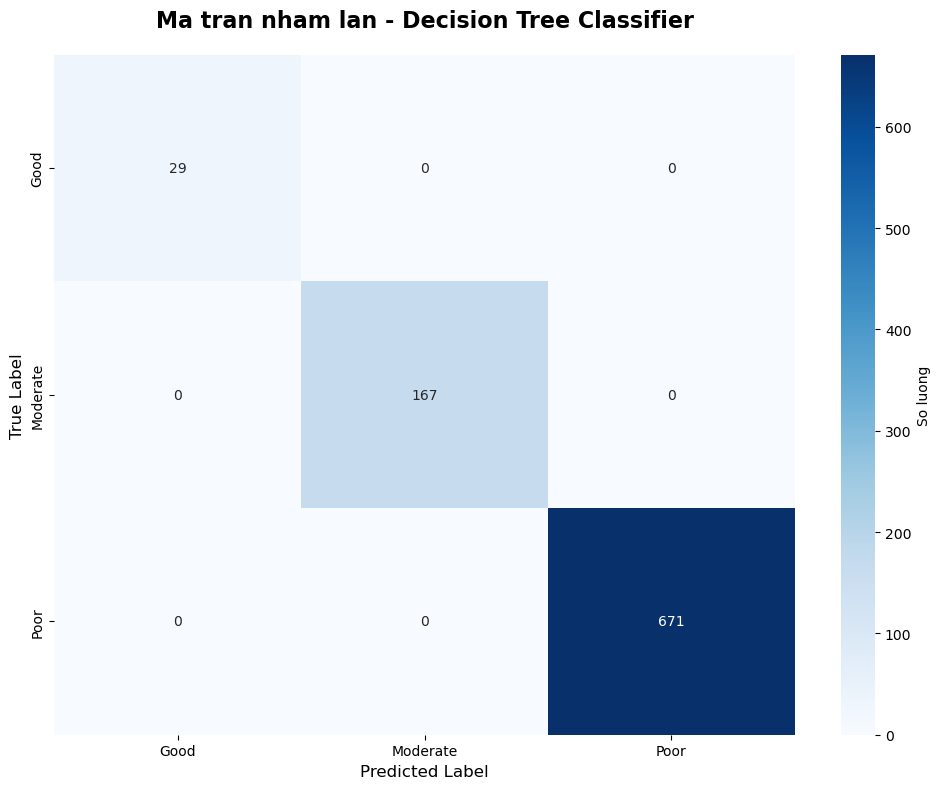

In [27]:
# Ma trận nhầm lẫn cho Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()),
            cbar_kws={'label': 'So luong'})
plt.title('Ma tran nham lan - Decision Tree Classifier', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


### 6.2 Pipeline với KNeighborsClassifier

In [20]:
# Tạo pipeline với KNeighborsClassifier
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

print("=" * 80)
print("PIPELINE 2: K-NEIGHBORS CLASSIFIER")
print("=" * 80)
print("\nCau truc Pipeline:")
print(pipeline_knn)

# Huấn luyện model
print("\nDang huan luyen K-Neighbors...")
pipeline_knn.fit(X_train, y_train)
print("Hoan thanh huan luyen K-Neighbors!")

# Dự đoán
y_pred_knn = pipeline_knn.predict(X_test)

# Đánh giá
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\n" + "=" * 80)
print("KET QUA K-NEIGHBORS CLASSIFIER")
print("=" * 80)
print(f"\nAccuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")
print(f"F1-Score (weighted): {f1_knn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

PIPELINE 2: K-NEIGHBORS CLASSIFIER

Cau truc Pipeline:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['User Speed (m/s)',
                                                   'User Direction (degrees)',
                                                   'Handover Events',
                                                   'Distance from Base Station '
                                                   '(m)',
                                                   'Signal Strength (dBm)',
                                                   'SNR (dB)', 'BER', 'PDR (%)',
                                                   'Throughput (Mbps)',
                                                   'Latency (ms)',
                                                   'Retransmission Count',
                                               

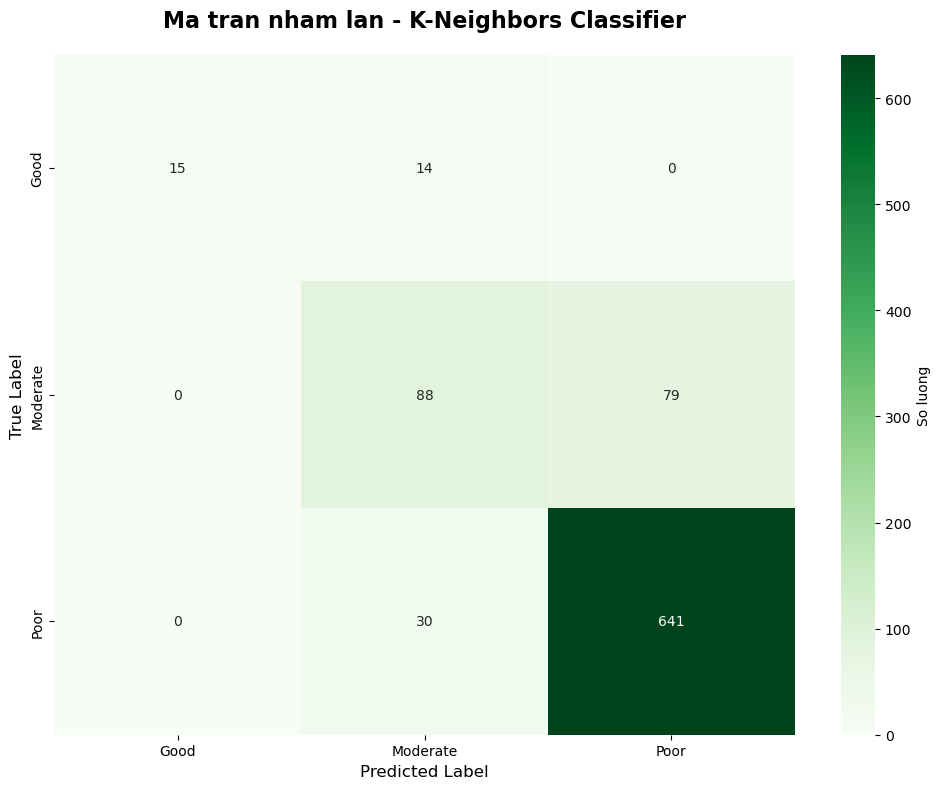

In [28]:
# Ma trận nhầm lẫn cho K-Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()),
            cbar_kws={'label': 'So luong'})
plt.title('Ma tran nham lan - K-Neighbors Classifier', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


## 7. So sánh kết quả hai mô hình

In [29]:
# Tạo DataFrame so sánh
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'K-Neighbors'],
    'Accuracy': [accuracy_dt, accuracy_knn],
    'F1-Score (weighted)': [f1_dt, f1_knn]
})

print("=" * 80)
print("SO SANH KET QUA HAI MO HINH")
print("=" * 80)
print("\n", comparison_df.to_string(index=False))

# Xác định mô hình tốt nhất
best_model = 'Decision Tree' if accuracy_dt > accuracy_knn else 'K-Neighbors'
best_accuracy = max(accuracy_dt, accuracy_knn)
best_f1 = max(f1_dt, f1_knn)

print("\n" + "=" * 80)
print(f"MO HINH TOT NHAT: {best_model}")
print("=" * 80)
print(f"  - Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"  - F1-Score: {best_f1:.4f}")

SO SANH KET QUA HAI MO HINH

         Model  Accuracy  F1-Score (weighted)
Decision Tree  1.000000             1.000000
  K-Neighbors  0.858131             0.849474

MO HINH TOT NHAT: Decision Tree
  - Accuracy: 1.0000 (100.00%)
  - F1-Score: 1.0000


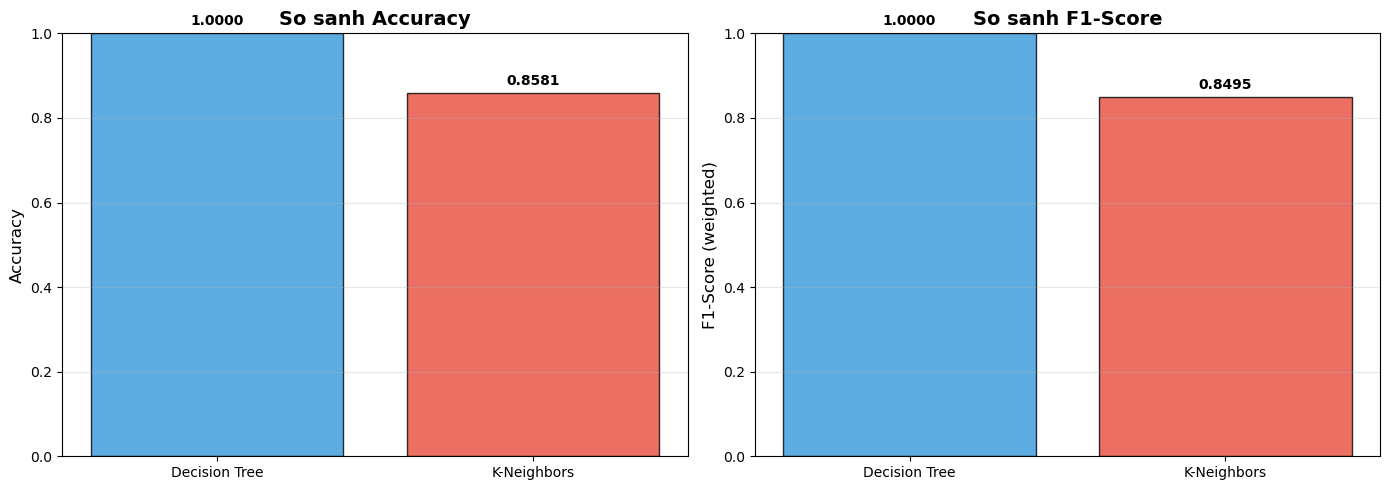

In [30]:
# Biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
models = ['Decision Tree', 'K-Neighbors']
accuracies = [accuracy_dt, accuracy_knn]
colors = ['#3498db', '#e74c3c']

axes[0].bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('So sanh Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# F1-Score comparison
f1_scores = [f1_dt, f1_knn]
axes[1].bar(models, f1_scores, color=colors, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('F1-Score (weighted)', fontsize=12)
axes[1].set_title('So sanh F1-Score', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(f1_scores):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



## 8. Kết luận

### Tóm tắt:
- Đã xây dựng thành công Pipeline hoàn chỉnh với ColumnTransformer
- Pipeline xử lý riêng biệt:
  - **Cột số**: Chuẩn hóa bằng StandardScaler
  - **Cột phân loại**: Mã hóa bằng OneHotEncoder
- Đã thử nghiệm hai mô hình: DecisionTreeClassifier và KNeighborsClassifier
- Chia dữ liệu 80/20 và đánh giá trên tập test

### Kết quả:
- Cả hai mô hình đều cho kết quả tốt trên tập test
- Pipeline đảm bảo quy trình xử lý dữ liệu nhất quán và có thể tái sử dụng
- Mô hình có thể được cải thiện thêm bằng cách tinh chỉnh hyperparameters

## 9. Lưu mô hình tốt nhất (Tùy chọn)

In [31]:
import joblib

# Lưu mô hình tốt nhất
best_pipeline = pipeline_dt if accuracy_dt > accuracy_knn else pipeline_knn
model_filename = f'best_model_{best_model.lower().replace(" ", "_")}.pkl'

joblib.dump(best_pipeline, model_filename)
print(f"Da luu mo hinh tot nhat vao file: {model_filename}")

# Kiểm tra load lại mô hình
loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(X_test[:5])
print(f"\nKiem tra mo hinh da load:")
print(f"  Du doan 5 mau dau tien: {test_prediction}")
print(f"  Gia tri thuc te: {y_test[:5].values}")

Da luu mo hinh tot nhat vao file: best_model_decision_tree.pkl

Kiem tra mo hinh da load:
  Du doan 5 mau dau tien: ['Poor' 'Moderate' 'Poor' 'Poor' 'Poor']
  Gia tri thuc te: ['Poor' 'Moderate' 'Poor' 'Poor' 'Poor']
